In [516]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [517]:
df = pd.read_csv('cleaned_dataset.csv')

In [518]:
df

,age,name,selling_price,km_driven,transmission,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_encoded,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,17,1.013158e+05,60000,70000,1,0,1,0,0.0,0,0,0,0,1
1,17,1.428000e+05,135000,50000,1,0,1,0,0.0,0,0,0,0,1
2,12,4.729164e+05,600000,100000,1,0,1,0,0.0,0,1,0,0,0
3,7,2.149998e+05,250000,46000,1,0,1,0,0.0,0,0,0,0,1
4,10,5.291667e+05,450000,141000,1,0,1,0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,10,3.612500e+05,409999,80000,1,0,1,0,1.0,0,1,0,0,0
3536,10,4.739125e+05,409999,80000,1,0,1,0,1.0,0,1,0,0,0
3537,15,8.260000e+04,110000,83000,1,0,1,0,1.0,0,0,0,0,1
3538,8,1.191250e+06,865000,90000,1,0,1,0,0.0,0,1,0,0,0


In [519]:
X = df.drop('selling_price', axis=1)  # Features
y = df['selling_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [520]:
# normalize 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [521]:
random_forest_model = RandomForestRegressor()
linear_model = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

random_forest_model.fit(X_train_scaled, y_train)

linear_model.fit(X_train_scaled, y_train)

lasso.fit(X_train_scaled, y_train)

ridge.fit(X_train_scaled, y_train)

c:\Users\kelvi\OneDrive\Desktop\AI assignment\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+13, tolerance: 7.594e+10
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=0.1)

In [522]:
random_forest_predictions = random_forest_model.predict(X_test_scaled)
linear_predictions = linear_model.predict(X_test_scaled)
lasso_predictions = lasso.predict(X_test_scaled)
ridge_predictions = ridge.predict(X_test_scaled)


In [523]:
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

mse_lasso = mean_squared_error(y_test, lasso_predictions)
r2_lasso = r2_score(y_test, lasso_predictions)

mse_ridge = mean_squared_error(y_test, ridge_predictions)
r2_ridge = r2_score(y_test, ridge_predictions)


print("Random Forest Regressor:")
print(f"Mean Squared Error: {random_forest_mse}")
print(f"R2: {random_forest_r2}\n")

print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R2: {linear_r2}\n")

print("Lasso Regressor:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R2: {r2_lasso}\n")

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R2: {r2_ridge}")


# random forest is the best model

Random Forest Regressor:
Mean Squared Error: 67557041604.962265
R2: 0.7051390955811014

Linear Regression:
Mean Squared Error: 77894318139.46498
R2: 0.660020797979866

Lasso Regressor:
Mean Squared Error: 77845330074.35127
R2: 0.6602346123335143

Ridge Regression:
Mean Squared Error: 77845786820.97299
R2: 0.6602326188074692


In [527]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END m

In [525]:
from math import sqrt

best_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)


mse_best_rf = mean_squared_error(y_test, y_pred)
r2_best_rf = r2_score(y_test, y_pred)
mae_best_rf = mean_absolute_error(y_test, y_pred)
rmse_best_rf = sqrt(mean_squared_error(y_test, y_pred))

print(f'Optimized Random Forest Regressor:')
print(f"Mean Squared Error: {mse_best_rf}")
print(f"Root Mean Squared Error: {rmse_best_rf}")
print(f"Mean Absolute Error: {mae_best_rf}")
print(f"R2: {r2_best_rf}\n")


Optimized Random Forest Regressor:
Mean Squared Error: 65207165053.160065
Root Mean Squared Error: 255356.93656754278
Mean Absolute Error: 120475.6659336372
R2: 0.7153954168893788



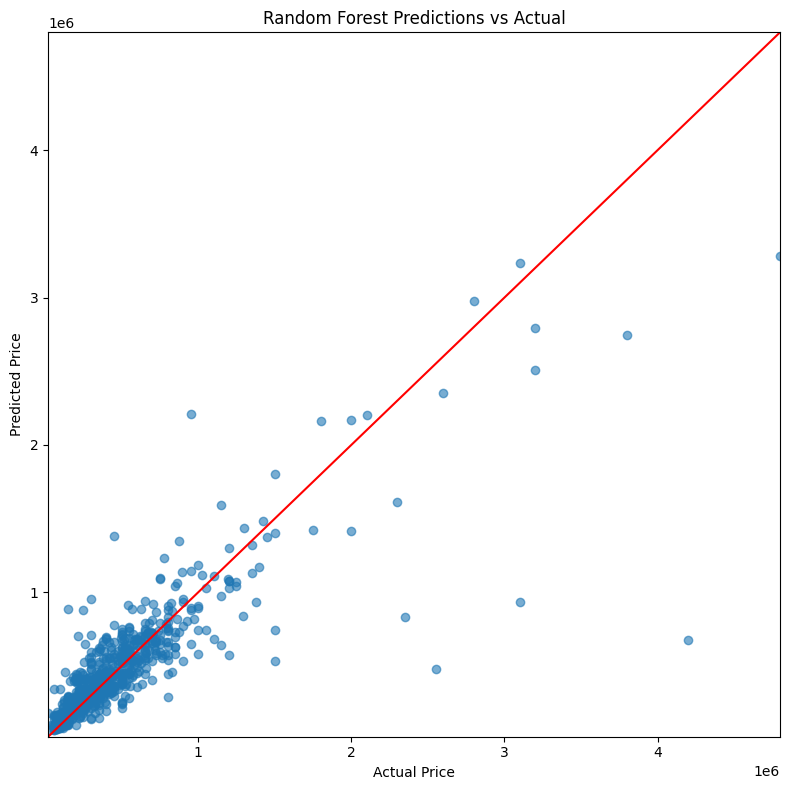

In [526]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

plt.tight_layout()
plt.show()